In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import os

In [44]:
np.random.seed(22)
from tensorflow import keras
from keras.backend import eval  # Used to get model parameters of saved models

In [45]:
from tensorflow.keras.layers import Dense, Flatten, Input
from tensorflow.keras.models import Sequential

In [46]:
mnist_data = keras.datasets.mnist.load_data()

In [47]:
(X_train_full, y_train_full), (X_test, y_test) = mnist_data  # load_data returns two tuples for training and testing

In [48]:
X_train_full.shape, y_train_full.shape                       # shape of the training tuple

((60000, 28, 28), (60000,))

In [49]:
X_test.shape, y_test.shape                                   # shape of the testing tuple

((10000, 28, 28), (10000,))

In [50]:
X_train_full.dtype, y_train_full.dtype                       # dtypes in the training tuple

(dtype('uint8'), dtype('uint8'))

In [51]:
X_train_flattened = X_train_full.flatten()
X_train_flattened_unique = pd.Series(X_train_flattened).unique()
print(f'X_train_flattened: min: {min(X_train_flattened_unique)}, max: {max(X_train_flattened_unique)}')
X_train_flattened_unique

X_train_flattened: min: 0, max: 255


array([  0,   3,  18, 126, 136, 175,  26, 166, 255, 247, 127,  30,  36,
        94, 154, 170, 253, 225, 172, 242, 195,  64,  49, 238, 251,  93,
        82,  56,  39, 219, 198, 182, 241,  80, 156, 107, 205,  11,  43,
        14,   1,  90, 139, 190,   2,  70,  35, 160, 108,  81, 240, 119,
        25,  45, 186, 150,  27,  16, 252, 187, 249,  46, 130, 183, 207,
       148, 229, 250,  24, 114, 221, 201,  78,  23,  66, 213, 171,   9,
        55, 226, 244, 133, 212, 135, 132,  51, 159,  50,  48, 237,  54,
       227, 239, 233,  57,   6,  10,  60, 224, 202,  84, 122, 163,  96,
       189, 167, 228,  47,  79, 168, 179,  12,  75, 121,  21, 243,  38,
       165, 208,   7, 178,  71,  19,  28,  63, 196,  76, 246, 112,  85,
       230, 223, 131, 145, 173,  86, 162, 146,  29, 215, 199, 128, 141,
        37,  67, 232,  62, 120, 180, 153, 210,  40, 220, 254, 222, 125,
       245, 231, 216, 248,  91, 116, 144, 234, 143,   5, 177,  98, 102,
       169, 137, 124,  68, 236, 211,  31,   8, 155,  20, 235,  3

In [52]:
pd.Series(X_train_flattened).value_counts(normalize=True)

0      0.808798
253    0.032169
254    0.017040
252    0.013901
255    0.006681
         ...   
74     0.000294
124    0.000293
77     0.000288
90     0.000270
87     0.000269
Length: 256, dtype: float64

In [53]:
X_train_full = X_train_full.astype('float32')/255.  # X-values should be floats.
X_test = X_test.astype('float32')/255.              # Do the same for X-test.
                                                    # y-values can be integers because they're labels

In [62]:
print(np.min(X_train_full), np.max(X_train_full))
print(np.min(X_test), np.max(X_test))

0.0 1.0
0.0 1.0


In [55]:
X_valid, X_train = X_train_full[:5000], X_train_full[5000:]  # Split full training set into validation and
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]  # training sets

In [16]:
y_train

array([7, 3, 4, ..., 5, 6, 8], dtype=uint8)

In [17]:
def display_images(rows, cols):
    fig, axes = plt.subplots(rows, cols, figsize=(15, 10))
    for row in range(rows):
        for col in range(cols):
            offset = row * rows + col
            axes[row, col].imshow(X_train[offset], cmap='gray')
            # axes[row, col].text(0, -2, class_names[y_train[offset]], c='r', size=24)
            axes[row, col].axis('off')
    plt.show()

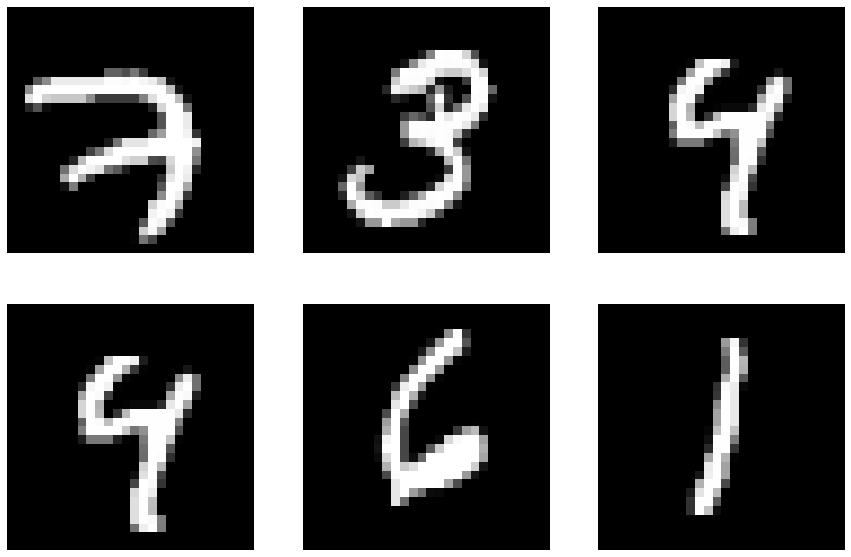

In [18]:
display_images(2, 3)

## Let's try a basic Sequential model

In [19]:
model = Sequential([
    Flatten(input_shape=[28, 28]),           # The shape of the weight matrix depends on the inputs.
                                             # This is why we have to specify the input_shape, so future layers
                                             # can know what size the weight matrix will be.
    Dense(784, activation='relu'),           # You can set weights for a layer using kernel_initializer=...
                                             # or using model.layer[1].set_weights(weights).
    Dense(784, activation='relu'),           # You can set biases for a layer using bias_initializer=...
    Dense(10, activation='softmax')
])
model

In [20]:
model.summary()                                            # Show the model

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 784)               615440    
_________________________________________________________________
dense_1 (Dense)              (None, 784)               615440    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                7850      
Total params: 1,238,730
Trainable params: 1,238,730
Non-trainable params: 0
_________________________________________________________________


In [21]:
input_layer = model.layers[0]                              # Access model layers
hidden1 = model.layers[1]
hidden2 = model.layers[2]
output = model.layers[3]
input_layer.name, hidden1.name, hidden2.name, output.name

('flatten', 'dense', 'dense_1', 'dense_2')

In [22]:
weights, biases = hidden1.get_weights()                    # Get the weights and biases for a layer
weights.shape, biases.shape

((784, 784), (784,))

In [23]:
weights                                                    # Weights are randomly initialized

array([[-0.00225888,  0.04697841,  0.01112037, ...,  0.02989012,
         0.04169651,  0.04903882],
       [-0.01552659, -0.01660661, -0.04643985, ..., -0.05024278,
        -0.00595437, -0.00277968],
       [-0.03015117,  0.04534225,  0.0220088 , ...,  0.04118616,
        -0.04280865, -0.01651212],
       ...,
       [-0.02721147, -0.04566959,  0.01323575, ...,  0.00384652,
         0.02098994,  0.00508282],
       [-0.03400004,  0.05828088, -0.04006698, ...,  0.05198991,
         0.00293038, -0.02200847],
       [ 0.05358063, -0.01964885, -0.05478416, ..., -0.04196943,
        -0.00681367, -0.03445759]], dtype=float32)

In [24]:
biases                                                     # Biases are initialized to 0

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [25]:
root_logdir = os.path.join(os.curdir, 'my_logs')
print(f'root_logdir: {root_logdir}')

def get_run_logdir(lr):
    import time
    run_id = time.strftime(f'run_%Y_%m_%d_%H_%M_%S_{lr}')
    return os.path.join(root_logdir, run_id)

root_logdir: ./my_logs


In [26]:
model_filename = os.path.join(os.curdir, 'data', 
                              'best_model_while_searching_lr.h5')
checkpoint_cb = keras.callbacks.ModelCheckpoint(  # By default the callback will monitor val_loss
                    model_filename,
                    save_best_only=True)

def load_model():
    return keras.models.load_model(model_filename)

def get_lr_from_model(model):
    return eval(model.optimizer.lr)

In [27]:
early_stopping_cb = keras.callbacks.EarlyStopping(  # By default the callback will monitor val_loss
                        patience=10,
                        restore_best_weights=True)

In [32]:
def mnist_with_different_lr(lr=0.01):
    model = Sequential([
        Flatten(input_shape=[28, 28]),           # The shape of the weight matrix depends on the inputs.
                                                 # This is why we have to specify the input_shape, so future layers
                                                 # can know what size the weight matrix will be.
        Dense(784, activation='relu'),           # You can set weights for a layer using kernel_initializer=...
                                                 # or using model.layer[1].set_weights(weights).
        Dense(784, activation='relu'),           # You can set biases for a layer using bias_initializer=...
        Dense(10, activation='softmax')
    ])
    
    model.compile(loss='sparse_categorical_crossentropy',  # 'sparse_categorical_crossentropy' is same as
                                                           # keras.losses.sparse_categorical_crossentropy
                                                           # We're using this loss since we have sparse labels (
                                                           # on value per instance, rather than one-hot-encoded lables).
                                                           #
                                                           # Here's what to use based on label types:
                                                           #   label type     loss function              activation_function
                                                           #
                                                           # one-hot-labels  categorical_crossentropy         sigmoid
                                                           # sparse labels   sparse_categorical_crossentropy  softmax
                                                           # 
                                                           # sparse labels > keras.utils.to_categorical() > one-hot-labels
                                                           # sparse labels <         np.argmax()          < one-hot-labels
                                                           #
                  optimizer=keras.optimizers.SGD(lr=lr),   # 'sgd' is same as keras.optimizers.SGD(), 
                                                           # except default values are used here.
                                                           # With 'sgd', learning_rate defaults to 0.01.
                  metrics=['accuracy']) # Any extra metrics we want to see.
                                        # 'accuracy' is same as keras.metrics.sparse_categorical_accuracy

    return model

In [239]:
for lr in [0.001, 0.01, 0.1, 1.0]:
    model = mnist_with_different_lr(lr)
    run_logdir = get_run_logdir(lr)
    print(f'run_logdir: {run_logdir}')
    
    tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)
    history = model.fit(X_train, y_train, epochs=100,
                        validation_data=(X_valid, y_valid),
                        callbacks=[tensorboard_cb,
                                   checkpoint_cb,
                                   early_stopping_cb])

run_logdir: ./my_logs/run_2019_10_29_16_17_48_0.001
Train on 55000 samples, validate on 5000 samples
Epoch 1/100
55000/55000 [==============================] - 10s 183us/sample - loss: 1.6509 - accuracy: 0.6718 - val_loss: 1.0816 - val_accuracy: 0.8106
Epoch 2/100
55000/55000 [==============================] - 10s 174us/sample - loss: 0.8268 - accuracy: 0.8339 - val_loss: 0.6325 - val_accuracy: 0.8586
Epoch 3/100
55000/55000 [==============================] - 9s 172us/sample - loss: 0.5675 - accuracy: 0.8658 - val_loss: 0.4847 - val_accuracy: 0.8808
Epoch 4/100
55000/55000 [==============================] - 10s 174us/sample - loss: 0.4669 - accuracy: 0.8825 - val_loss: 0.4140 - val_accuracy: 0.8954
Epoch 5/100
55000/55000 [==============================] - 9s 173us/sample - loss: 0.4134 - accuracy: 0.8916 - val_loss: 0.3730 - val_accuracy: 0.9038
Epoch 6/100
55000/55000 [==============================] - 10s 173us/sample - loss: 0.3797 - accuracy: 0.8986 - val_loss: 0.3457 - val_accura

55000/55000 [==============================] - 9s 165us/sample - loss: 0.1286 - accuracy: 0.9643 - val_loss: 0.1245 - val_accuracy: 0.9674
Epoch 8/100
55000/55000 [==============================] - 9s 166us/sample - loss: 0.1155 - accuracy: 0.9685 - val_loss: 0.1162 - val_accuracy: 0.9710
Epoch 9/100
55000/55000 [==============================] - 9s 166us/sample - loss: 0.1041 - accuracy: 0.9714 - val_loss: 0.1063 - val_accuracy: 0.9722
Epoch 10/100
55000/55000 [==============================] - 9s 166us/sample - loss: 0.0950 - accuracy: 0.9732 - val_loss: 0.1019 - val_accuracy: 0.9738
Epoch 11/100
55000/55000 [==============================] - 9s 165us/sample - loss: 0.0868 - accuracy: 0.9762 - val_loss: 0.0963 - val_accuracy: 0.9746
Epoch 12/100
55000/55000 [==============================] - 9s 165us/sample - loss: 0.0795 - accuracy: 0.9781 - val_loss: 0.0963 - val_accuracy: 0.9724
Epoch 13/100
55000/55000 [==============================] - 9s 169us/sample - loss: 0.0735 - accuracy: 

![MNIST Tensorboard plots](img/MNIST_tensorboard_plots.png)

## These figures show the Validation accuracy and loss per epoch on Tensorboard

In [29]:
# Instead of this, we used Tensorboard. It's really easy to use.
# All it needs is a callback.
# This is here only to show how we can plot without Tensorboard.
# Of course, you need to save the histories of each run and
# write a function that will plot all those histories
# on the same plot.
#
# pd.DataFrame(history.history).plot(figsize=(8, 5))
# plt.grid(True)
# plt.gca().set_ylim([0.0, 1.0])
# plt.show()

In [33]:
def zoom_into_lr(midpoint, delta):
    for lr in np.arange(midpoint-delta*2, midpoint+delta*3, delta):
        model = mnist_with_different_lr(lr)
        run_logdir = get_run_logdir(lr)
        print(f'run_logdir: {run_logdir}')

        tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)
        history = model.fit(X_train, y_train, epochs=100,
                            validation_data=(X_valid, y_valid),
                            callbacks=[tensorboard_cb,
                                       checkpoint_cb,
                                       early_stopping_cb])

In [35]:
# We could have done this in a loop, but this is more explicit.
lr = get_lr_from_model(load_model())
zoom_into_lr(lr, lr/10.)

run_logdir: ./my_logs/run_2019_10_29_17_02_20_0.0800000011920929
Train on 55000 samples, validate on 5000 samples
Epoch 1/100
55000/55000 [==============================] - 10s 174us/sample - loss: 0.2685 - accuracy: 0.9209 - val_loss: 0.1299 - val_accuracy: 0.9638
Epoch 2/100
55000/55000 [==============================] - 9s 168us/sample - loss: 0.1113 - accuracy: 0.9669 - val_loss: 0.0914 - val_accuracy: 0.9726
Epoch 3/100
55000/55000 [==============================] - 9s 170us/sample - loss: 0.0726 - accuracy: 0.9785 - val_loss: 0.0779 - val_accuracy: 0.9788
Epoch 4/100
55000/55000 [==============================] - 9s 170us/sample - loss: 0.0517 - accuracy: 0.9844 - val_loss: 0.0755 - val_accuracy: 0.9760
Epoch 5/100
55000/55000 [==============================] - 10s 178us/sample - loss: 0.0381 - accuracy: 0.9886 - val_loss: 0.0705 - val_accuracy: 0.9796
Epoch 6/100
55000/55000 [==============================] - 9s 172us/sample - loss: 0.0269 - accuracy: 0.9925 - val_loss: 0.0660 -

![MNIST Tensorboard plots](img/MNIST_tensorboard_plots_zooming_in.png)

In [38]:
lr = get_lr_from_model(load_model())
zoom_into_lr(lr, lr/100.)

run_logdir: ./my_logs/run_2019_10_29_17_23_52_0.11760000467300415
Train on 55000 samples, validate on 5000 samples
Epoch 1/100
55000/55000 [==============================] - 10s 177us/sample - loss: 0.2416 - accuracy: 0.9288 - val_loss: 0.1252 - val_accuracy: 0.9642
Epoch 2/100
55000/55000 [==============================] - 9s 172us/sample - loss: 0.0938 - accuracy: 0.9719 - val_loss: 0.0848 - val_accuracy: 0.9742
Epoch 3/100
55000/55000 [==============================] - 9s 172us/sample - loss: 0.0590 - accuracy: 0.9820 - val_loss: 0.0815 - val_accuracy: 0.9764
Epoch 4/100
55000/55000 [==============================] - 9s 172us/sample - loss: 0.0404 - accuracy: 0.9873 - val_loss: 0.0992 - val_accuracy: 0.9710
Epoch 5/100
55000/55000 [==============================] - 9s 167us/sample - loss: 0.0287 - accuracy: 0.9910 - val_loss: 0.0623 - val_accuracy: 0.9810
Epoch 6/100
55000/55000 [==============================] - 9s 168us/sample - loss: 0.0190 - accuracy: 0.9946 - val_loss: 0.0778 -

Epoch 5/100
55000/55000 [==============================] - 9s 165us/sample - loss: 0.0279 - accuracy: 0.9917 - val_loss: 0.0557 - val_accuracy: 0.9840
Epoch 6/100
55000/55000 [==============================] - 9s 172us/sample - loss: 0.0195 - accuracy: 0.9945 - val_loss: 0.0628 - val_accuracy: 0.9826
Epoch 7/100
55000/55000 [==============================] - 9s 162us/sample - loss: 0.0127 - accuracy: 0.9967 - val_loss: 0.0568 - val_accuracy: 0.9852
Epoch 8/100
55000/55000 [==============================] - 9s 163us/sample - loss: 0.0090 - accuracy: 0.9979 - val_loss: 0.0596 - val_accuracy: 0.9822
Epoch 9/100
55000/55000 [==============================] - 9s 167us/sample - loss: 0.0053 - accuracy: 0.9990 - val_loss: 0.0592 - val_accuracy: 0.9848
Epoch 10/100
55000/55000 [==============================] - 9s 164us/sample - loss: 0.0032 - accuracy: 0.9997 - val_loss: 0.0577 - val_accuracy: 0.9872
Epoch 11/100
55000/55000 [==============================] - 9s 161us/sample - loss: 0.0019 - 

![MNIST Tensorboard plots](img/MNIST_tensorboard_plots_zooming_in_2.png)

## Load saved model

In [56]:
model = load_model()
lr = get_lr_from_model(model)
print(f'Final lr: {lr}')

Final lr: 0.12000000476837158


## Final test accuracy

In [69]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f"loss: {loss.round(2)}, accuracy: {accuracy.astype('float64').round(2)}")

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

loss: 0.06, accuracy: 0.98
